## 📝 Practice Questions

## Section 1

You have a dataset of customers with columns: `CustomerID, Name, Age, Gender, City, PurchaseAmount, PurchaseDate`.

- Clean the data: fill missing ages with the average, fill missing cities with the most common city, and drop rows where purchase amount is missing.
- Standardize the city names so they are in title case (e.g., “delhi” → “Delhi”).
- Extract only the first name from the customer’s full name and store it in a new column.
- Mark each customer as `"High"` or `"Low"` spender depending on whether their purchase amount is above or below the overall average.

Importing all required libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read the CSV file to perform operations

In [76]:
df = pd.read_csv("./customer_sales_data.csv")

In [41]:
df.isnull().sum()

CustomerID          0
Name              150
Age               350
Gender            250
City              500
PurchaseAmount    400
PurchaseDate        0
dtype: int64

In [42]:
df.fillna({"Age":int(df["Age"].mean())}, inplace=True)

In [43]:
cCity = df.City.value_counts().idxmax()

In [44]:
df.fillna({"City":df.City.value_counts().idxmax()}, inplace=True)

In [45]:
df.dropna(subset=["PurchaseAmount"],axis=0, inplace=True)

In [46]:
df["City"] = df["City"].apply(lambda x: x.capitalize())

In [47]:
def firstName(name):
    fName = name.split(" ")
    return fName[0]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4600 non-null   int64  
 1   Name            4461 non-null   object 
 2   Age             4600 non-null   float64
 3   Gender          4377 non-null   object 
 4   City            4600 non-null   object 
 5   PurchaseAmount  4600 non-null   float64
 6   PurchaseDate    4600 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 287.5+ KB


In [49]:
df["First-Name"] = df["Name"].apply(lambda name: name.split(" ")[0] if type(name) == str else None)

In [50]:
df["Purchase-Lable"] = df["PurchaseAmount"].apply(lambda amount : "Hight" if amount > df["PurchaseAmount"].mean() else "Low")

## Section 2

From the same dataset:

- Count how many unique cities there are.
- Show the number of customers in each city.
- For each city, calculate the average, median, and spread of purchase amount.
- Which city has the highest average spending?

In [51]:
df["City"].value_counts().count()

np.int64(7)

In [52]:
df.groupby("City")["CustomerID"].count() 

City
Bangalore     627
Chennai       577
Delhi         574
Hyderabad     585
Kolkata       559
Mumbai       1081
Pune          597
Name: CustomerID, dtype: int64

In [53]:
df.groupby("City")["PurchaseAmount"].agg(["mean","median","std"])

,mean,median,std
City,,,
Bangalore,24776.504689,24841.400,14291.395555
Chennai,25450.395598,25555.350,14271.227297
Delhi,24190.642596,24079.515,13883.061878
Hyderabad,23868.739778,23352.740,13912.863870
Kolkata,24394.162630,23925.070,14243.528600
Mumbai,24345.914163,23947.220,14397.106554
Pune,25932.013920,26540.830,14128.132632


In [54]:
df.groupby("City")["PurchaseAmount"].mean().idxmax()

'Pune'

## Section 3

Using the cleaned dataset:

- Select customers older than 35 who spent more than 10,000.
- For each gender, calculate the total and average spending.
- Create a new column where you format purchase amount with a currency sign and two decimals (e.g., ₹10,500.00).
- Round ages to the nearest 5.

In [55]:
df[(df["Age"] > 35) & (df["PurchaseAmount"] > 10000)]

,CustomerID,Name,Age,Gender,City,PurchaseAmount,PurchaseDate,First-Name,Purchase-Lable
5,1227,Richard Bell,44.0,Male,Kolkata,12898.53,2025-01-22,Richard,Low
12,5668,Patricia Nixon,55.0,Male,Pune,25375.20,2023-06-24,Patricia,Hight
13,4644,Meagan Miller,52.0,Male,Delhi,43302.72,2025-01-18,Meagan,Hight
14,5626,Christina Chapman,40.0,Female,Mumbai,47086.55,2023-07-27,Christina,Hight
18,7187,Katrina Palmer,39.0,Male,Mumbai,39149.16,2025-04-19,Katrina,Hight
...,...,...,...,...,...,...,...,...,...
4992,6873,Ryan Jensen,36.0,Male,Delhi,37938.32,2025-03-30,Ryan,Hight
4996,4888,Natasha Brown,40.0,Female,Mumbai,44083.81,2025-11-26,Natasha,Hight
4997,9132,Johnny Mccoy,61.0,Male,Hyderabad,38496.78,2024-09-09,Johnny,Hight
4998,6619,Robert Leonard,40.0,Male,Pune,45610.27,2024-06-22,Robert,Hight


In [56]:
df.groupby("Gender")["PurchaseAmount"].agg(["sum","mean"])

,sum,mean
Gender,,
Female,54535793.99,24993.489455
Male,53412942.83,24333.914729


In [57]:
def currenSignApplier(amount):
    am = str(round(amount, 2))
    return "$"+am

In [58]:
df["Real-Amount"] = df["PurchaseAmount"].apply(currenSignApplier)

In [59]:
df["Age"] = df["Age"].apply(lambda num : round(num/5)*5)

In [60]:
df

,CustomerID,Name,Age,Gender,City,PurchaseAmount,PurchaseDate,First-Name,Purchase-Lable,Real-Amount
0,5289,William Wilkins,30,Male,Hyderabad,28072.73,2023-08-13,William,Hight,$28072.73
1,2029,Miss Amy Flores,20,Male,Mumbai,46993.34,2023-08-21,Miss,Hight,$46993.34
2,5870,Jacqueline Robles,25,Male,Kolkata,43605.53,2025-12-14,Jacqueline,Hight,$43605.53
3,9697,Melissa Ellison,70,Male,Bangalore,2789.61,2025-06-04,Melissa,Low,$2789.61
4,5427,Eric Guerrero,50,Female,Pune,9922.70,2024-08-15,Eric,Low,$9922.7
...,...,...,...,...,...,...,...,...,...,...
4995,1380,Sandra Tapia,30,Female,Mumbai,20424.35,2024-07-16,Sandra,Low,$20424.35
4996,4888,Natasha Brown,40,Female,Mumbai,44083.81,2025-11-26,Natasha,Hight,$44083.81
4997,9132,Johnny Mccoy,60,Male,Hyderabad,38496.78,2024-09-09,Johnny,Hight,$38496.78
4998,6619,Robert Leonard,40,Male,Pune,45610.27,2024-06-22,Robert,Hight,$45610.27


## Section 4

On the time-based column (`PurchaseDate`):

- Generate daily sales totals for the whole year.
- Resample them to get weekly averages and monthly totals.
- Add a column showing the day of week for each purchase.
- Add another column indicating if the purchase happened on a weekend or weekday.
- Plot sales trends over time, weekly and monthly.

In [61]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])

In [62]:
df.set_index("PurchaseDate", inplace=True)

In [63]:
df['PurchaseAmount'].resample("YE").sum()

PurchaseDate
2023-12-31    37618469.09
2024-12-31    38267112.34
2025-12-31    37618489.32
Freq: YE-DEC, Name: PurchaseAmount, dtype: float64

In [64]:
df["PurchaseAmount"].resample("W").mean()
df["PurchaseAmount"].resample("M").sum()

C:\Users\91930\AppData\Local\Temp\ipykernel_7356\683600981.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["PurchaseAmount"].resample("M").sum()


PurchaseDate
2023-01-31    3104698.34
2023-02-28    2871788.13
2023-03-31    3153518.04
2023-04-30    3026258.57
2023-05-31    3296645.04
2023-06-30    2723625.98
2023-07-31    3119698.19
2023-08-31    3095050.31
2023-09-30    3070096.82
2023-10-31    3767957.91
2023-11-30    3143497.11
2023-12-31    3245634.65
2024-01-31    3014683.64
2024-02-29    3716065.08
2024-03-31    2698139.62
2024-04-30    3193681.13
2024-05-31    3165140.75
2024-06-30    3451731.85
2024-07-31    3855291.03
2024-08-31    2993220.77
2024-09-30    3015813.27
2024-10-31    3050312.66
2024-11-30    2672031.09
2024-12-31    3441001.45
2025-01-31    3035872.88
2025-02-28    2796341.61
2025-03-31    3423164.24
2025-04-30    2473506.01
2025-05-31    2984438.05
2025-06-30    3039201.41
2025-07-31    3282039.00
2025-08-31    3816398.19
2025-09-30    3457960.18
2025-10-31    3262328.12
2025-11-30    2592686.32
2025-12-31    3454553.31
Freq: ME, Name: PurchaseAmount, dtype: float64

In [65]:
df["Day"] = df.index.day_name()

In [66]:
df["WeekendOrWeekday"] = df.index.dayofweek.map(lambda x: "Weekend" if x >= 5 else "Weekday")

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='PurchaseDate'>

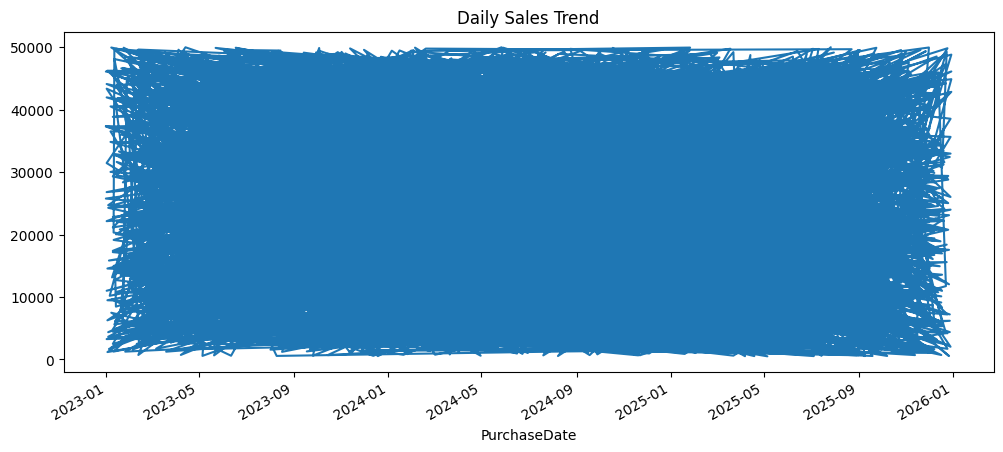

In [67]:
df["PurchaseAmount"].plot(figsize=(12,5), title="Daily Sales Trend")

<Axes: title={'center': 'Weekly Sales Trend'}, xlabel='PurchaseDate'>

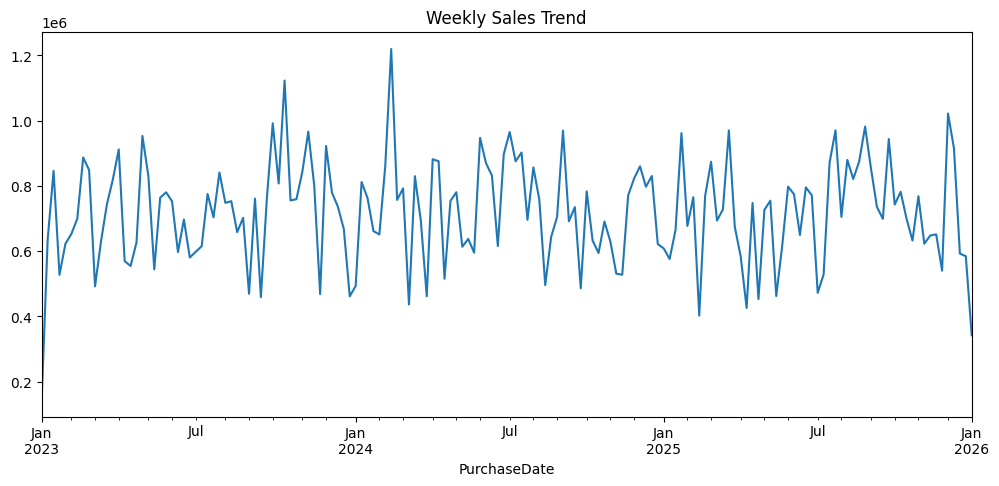

In [68]:
df.resample("W")["PurchaseAmount"].sum().plot(
    figsize=(12,5), 
    title="Weekly Sales Trend"
)

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='PurchaseDate'>

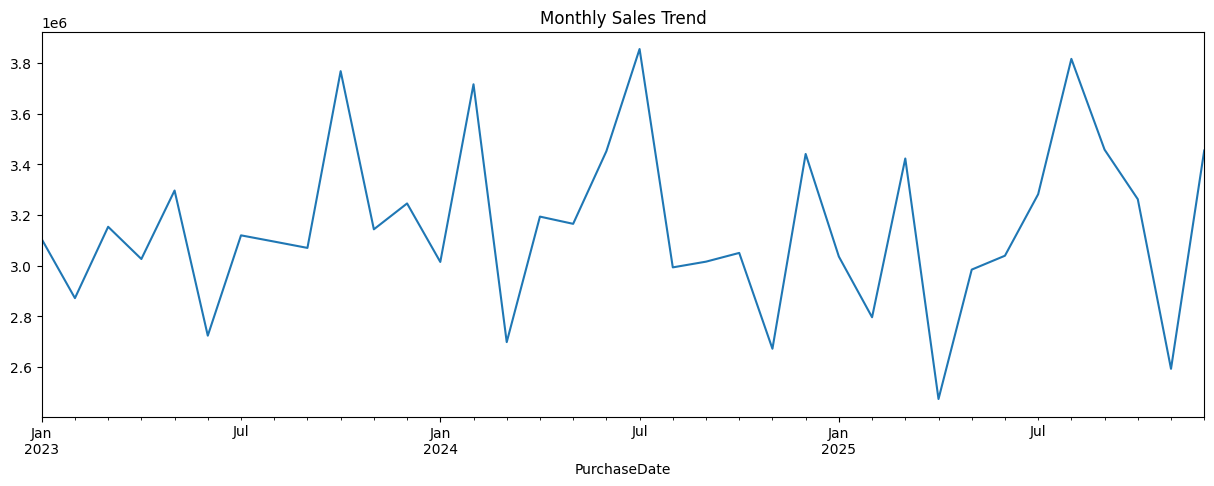

In [69]:
df.resample("ME")["PurchaseAmount"].sum().plot(
    figsize=(15,5),
    title="Monthly Sales Trend"
)

## Section 5

Visualizations:

- Plot a bar chart of average purchase amount by city.
- Create a boxplot of purchase amount split by gender.
- Create a scatterplot of age vs. purchase amount, colored by city

<Axes: title={'center': 'Average purchase amount by city'}, xlabel='City'>

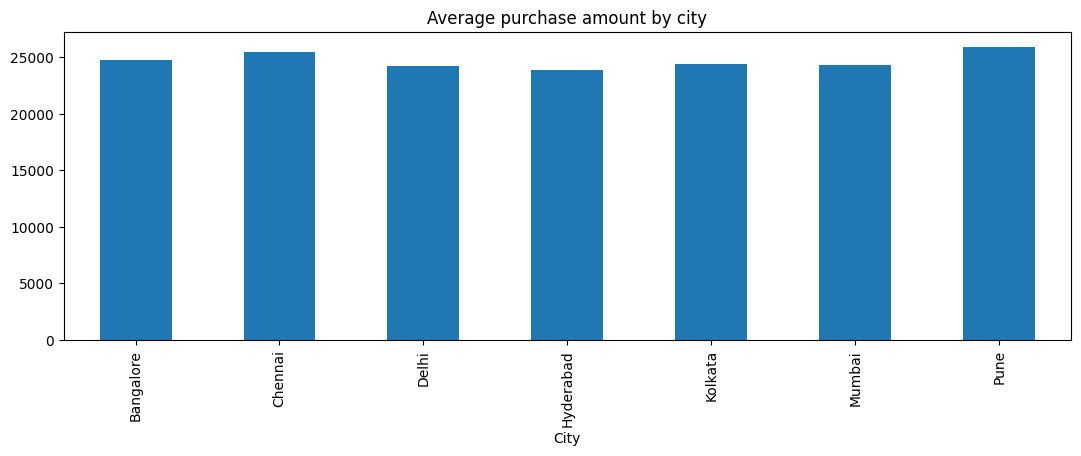

In [70]:
df.groupby("City")["PurchaseAmount"].mean().plot(kind="bar",figsize=(13,4), title="Average purchase amount by city")

<Axes: xlabel='Gender', ylabel='PurchaseAmount'>

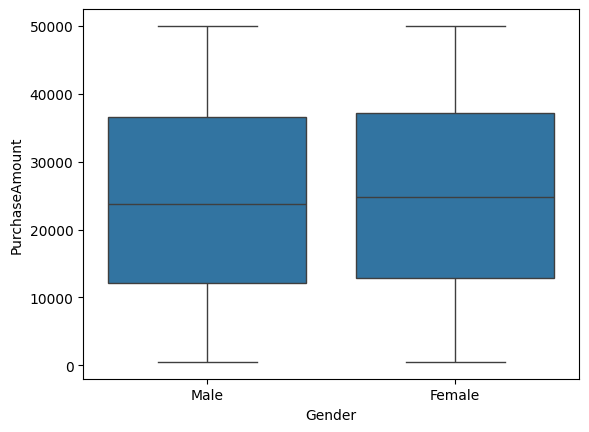

In [79]:
sns.boxplot(data=df, x="Gender", y="PurchaseAmount")

<Axes: xlabel='Age', ylabel='PurchaseAmount'>

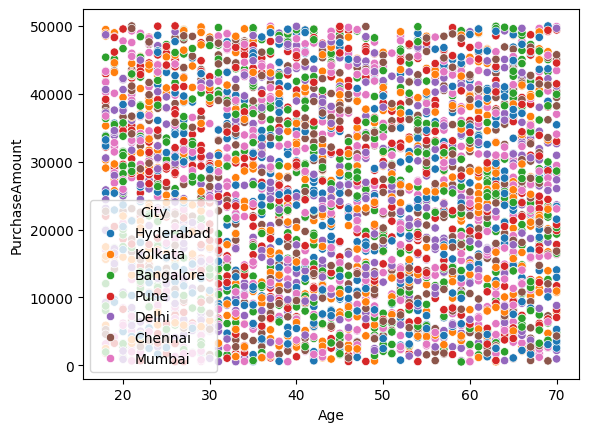

In [80]:
sns.scatterplot(data=df, x="Age",y="PurchaseAmount", hue="City")